# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você trabalha neste projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de começar a análise dos dados, explique com suas próprias palavras o propósito do projeto e as ações que planeja realizar.]

[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]

## Inicialização

In [48]:
# Carregando todas as bibliotecas
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import math

## Carregue os dados

In [49]:
# Carregue os arquivos de dados em diferentes DataFrames
df_calls = pd.read_csv('datasets/megaline_calls.csv')
df_internet = pd.read_csv('datasets/megaline_internet.csv')
df_messages = pd.read_csv('datasets/megaline_messages.csv')
df_plans = pd.read_csv('datasets/megaline_plans.csv')
df_users = pd.read_csv('datasets/megaline_users.csv')

## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

## Planos

In [50]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [51]:
# Imprima uma amostra de dados dos planos
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

<span style='color:red'> O dataframe é pequeno contendo apenas 2 itens, os tipos de dados parecem certos, claramente não há duplicata ou valor ausente, os nomes das colunas também estão formatados corretamente. Única mudança que pode ser feita é converter o plan_name para category.

## Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

## Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [52]:
df_plans['plan_name'] = df_plans['plan_name'].astype('category')
df_plans['plan_name'].dtype

CategoricalDtype(categories=['surf', 'ultimate'], ordered=False, categories_dtype=object)

## Usuários

In [53]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [54]:
# Imprima uma amostra de dados dos usuários
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

<span style='color:red'> A base de dados parece certinha, a coluna plans eu irei converter para category, pode beneficiar o processo futuramente, também converterei o reg_date e churn_date para datetime, os valores ausentes da coluna chun_date vao ser deixados já que é difícil achar um meio de substituir por outra coisa mas o que pode ser feito é adicionar uma coluna a mais informando se o cliente ainda estã utilizando o serviço, dessa forma não será necessário verificar se a data existe ou não sempre que for usa-la para algum calculo.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [55]:
#Verificando rapidamente se há duplicatas
df_users.duplicated().sum()

0

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [56]:
df_users['still_active'] = ~df_users['churn_date'].isna()
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,still_active
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,False
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,False
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,False
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,False
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,False


In [57]:
df_users['plan'] = df_users['plan'].astype('category')
df_users["churn_date"] = pd.to_datetime(df_users["churn_date"], errors='coerce')
df_users["reg_date"] = pd.to_datetime(df_users["reg_date"], errors='coerce')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       500 non-null    int64         
 1   first_name    500 non-null    object        
 2   last_name     500 non-null    object        
 3   age           500 non-null    int64         
 4   city          500 non-null    object        
 5   reg_date      500 non-null    datetime64[ns]
 6   plan          500 non-null    category      
 7   churn_date    34 non-null     datetime64[ns]
 8   still_active  500 non-null    bool          
dtypes: bool(1), category(1), datetime64[ns](2), int64(2), object(3)
memory usage: 28.6+ KB


## Chamadas

In [58]:
# Imprima informações gerais/resumo sobre o DataFrame das chamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [59]:
# Imprima uma amostra de dados das chamadas
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

<span style='color:red'> Parece que esta tudo ok com o base de dados, o call_date vai ser convertido para datetime, o duration pode existir um argumento de que mostrar os minutos e segundos fica mais legível do que mostra-lo em formato float, mas acredito que não seja necessário a conversão e fica mais pratico de calcular algo dessa forma e depois converter se for o caso.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [60]:
df_calls.duplicated().sum()

0

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [61]:
df_calls["call_date"] = pd.to_datetime(df_calls["call_date"], errors='coerce')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


## Mensagens

In [62]:
# Imprima informações gerais/resumo sobre o DataFrame das mensagens
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [63]:
# Imprima uma amostra dos dados das mensagens
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

<span style='color:red'> Novamente tudo ok, só converter message_date para datetime

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [64]:
df_messages.duplicated().sum()

0

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [65]:
df_messages["message_date"] = pd.to_datetime(df_messages["message_date"], errors='coerce')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


## Internet

In [66]:
# Imprima informações gerais/resumo sobre o DataFrame da internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [67]:
#  Imprima uma amostra de dados para o tráfego da internet
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

<span style='color:red'> Converter session_date para datetime

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [68]:
df_internet.duplicated().sum()

0

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [69]:
df_internet["session_date"] = pd.to_datetime(df_internet["session_date"], errors='coerce')
df_internet['mb_used'] = df_internet['mb_used']/1024
df_internet = df_internet.rename(columns={'mb_used': 'gb_used'})
df_internet.info()
df_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   gb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


,id,user_id,session_date,gb_used
0,1000_13,1000,2018-12-29,0.087754
1,1000_204,1000,2018-12-31,0.000000
2,1000_379,1000,2018-12-28,0.644922
3,1000_413,1000,2018-12-26,0.264639
4,1000_442,1000,2018-12-27,0.859590


## Estude as condições dos planos

[É fundamental entender como os planos funcionam, ou seja, como as cobranças dos usuários são feitas com base na assinatura. Sugerimos imprimir as informações sobre os planos para visualizar novamente as condições.]

In [70]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregue os dados por usuário

[Agora, como os dados estão limpos, os agregue por usuário e por período para ter apenas um registro dessas informações. Isso vai facilitar muito as próximas análises.]

In [71]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.
user_calls_per_month = (
    df_calls.groupby(['user_id', pd.Grouper(key='call_date', freq='ME')])
    .size()
    .reset_index(name='calls_made')
    .rename(columns={'call_date': 'date'})
)
user_calls_per_month['date'] = user_calls_per_month['date'].dt.strftime('%Y-%m')
user_calls_per_month.head()

,user_id,date,calls_made
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64


In [72]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
user_minutes_per_month = (
    df_calls.groupby(['user_id', pd.Grouper(key='call_date', freq='ME')])['duration']
    .sum()
    .reset_index(name='total_minutes')
    .rename(columns={'call_date': 'date'})
)
user_minutes_per_month['date'] = user_minutes_per_month['date'].dt.strftime('%Y-%m')
user_minutes_per_month.head()

,user_id,date,total_minutes
0,1000,2018-12,116.83
1,1001,2018-08,171.14
2,1001,2018-09,297.69
3,1001,2018-10,374.11
4,1001,2018-11,404.59


In [73]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.
user_messages_per_month = (
    df_messages.groupby(['user_id', pd.Grouper(key='message_date', freq='ME')])
    .size()
    .reset_index(name='messages_made')
    .rename(columns={'message_date': 'date'})
)
user_messages_per_month['date'] = user_messages_per_month['date'].dt.strftime('%Y-%m')
user_messages_per_month.head()

,user_id,date,messages_made
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [74]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.
user_mb_per_month = (
    df_internet.groupby(['user_id', pd.Grouper(key='session_date', freq='ME')])['gb_used']
    .sum()
    .reset_index(name='total_gb')
    .rename(columns={'session_date': 'date'})
)
user_mb_per_month['date'] = user_mb_per_month['date'].dt.strftime('%Y-%m')
user_mb_per_month.head()

,user_id,date,total_gb
0,1000,2018-12,1.856904
1,1001,2018-08,6.756982
2,1001,2018-09,13.002754
3,1001,2018-10,21.807119
4,1001,2018-11,18.070605


[Coloque os dados agregados em um DataFrame para que cada registro nele represente o que cada usuário consumiu em um determinado mês.]

In [75]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month
dfs = [user_minutes_per_month, user_messages_per_month, user_mb_per_month]

user_info_df = user_calls_per_month.copy()
for df in dfs:
    user_info_df = pd.merge(user_info_df, df, on=['user_id', 'date'],how='outer')
    user_info_df = user_info_df.loc[:, ~user_info_df.columns.duplicated()]

user_info_df["date"] = pd.to_datetime(user_info_df["date"], errors='coerce')
user_info_df.info()
user_info_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        2293 non-null   int64         
 1   date           2293 non-null   datetime64[ns]
 2   calls_made     2258 non-null   float64       
 3   total_minutes  2258 non-null   float64       
 4   messages_made  1806 non-null   float64       
 5   total_gb       2277 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 107.6 KB


,user_id,date,calls_made,total_minutes,messages_made,total_gb
0,1000,2018-12-01,16.0,116.83,11.0,1.856904
1,1001,2018-08-01,27.0,171.14,30.0,6.756982
2,1001,2018-09-01,49.0,297.69,44.0,13.002754
3,1001,2018-10-01,65.0,374.11,53.0,21.807119
4,1001,2018-11-01,64.0,404.59,36.0,18.070605


In [76]:
# Adicione as informações sobre o plano
user_info_df = user_info_df.merge(
    df_users[['user_id','plan']],
    on='user_id',
    how='left'
)
selected_columns = ['calls_made', 'total_minutes', 'messages_made', 'total_gb']
user_info_df.info()
user_info_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        2293 non-null   int64         
 1   date           2293 non-null   datetime64[ns]
 2   calls_made     2258 non-null   float64       
 3   total_minutes  2258 non-null   float64       
 4   messages_made  1806 non-null   float64       
 5   total_gb       2277 non-null   float64       
 6   plan           2293 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 110.0 KB


,user_id,date,calls_made,total_minutes,messages_made,total_gb,plan
0,1000,2018-12-01,16.0,116.83,11.0,1.856904,ultimate
1,1001,2018-08-01,27.0,171.14,30.0,6.756982,surf
2,1001,2018-09-01,49.0,297.69,44.0,13.002754,surf
3,1001,2018-10-01,65.0,374.11,53.0,21.807119,surf
4,1001,2018-11-01,64.0,404.59,36.0,18.070605,surf


In [77]:
# Preenche os valores vazios com a média de cada mês
def fillna_with_monthly_mean(row, col, monthly_means):
    if pd.isna(row[col]):
        return monthly_means.loc[row['month'], col]
    else:
        return row[col]

user_info_df['month'] = user_info_df['date'].dt.month
monthly_means = user_info_df.groupby('month')[['calls_made', 'total_minutes', 'messages_made', 'total_gb']].mean()
for col in ['calls_made', 'total_minutes', 'messages_made', 'total_gb']:
    user_info_df[col] = user_info_df.apply(fillna_with_monthly_mean, args=(col, monthly_means), axis=1)
user_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        2293 non-null   int64         
 1   date           2293 non-null   datetime64[ns]
 2   calls_made     2293 non-null   float64       
 3   total_minutes  2293 non-null   float64       
 4   messages_made  2293 non-null   float64       
 5   total_gb       2293 non-null   float64       
 6   plan           2293 non-null   category      
 7   month          2293 non-null   int32         
dtypes: category(1), datetime64[ns](1), float64(4), int32(1), int64(1)
memory usage: 118.9 KB


[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano; adicione o preço mensal dependendo do plano. Importante: isso talvez não seja tão simples e necessite de várias linhas, considerando as condições do plano. Portanto, não se preocupe se você passar algum tempo nesta etapa.]

In [78]:
# Calcule a receita mensal para cada usuário
def payment(row):

    plan_data = df_plans.loc[df_plans['plan_name'] == row['plan']].iloc[0]
    
    total_minutes = row['total_minutes']
    messages_made = row['messages_made']
    total_gb = row['total_gb']
    
    minutes_included = plan_data['minutes_included']
    messages_included = plan_data['messages_included']
    mb_per_month_included = plan_data['mb_per_month_included']
    usd_monthly_pay = plan_data['usd_monthly_pay']
    usd_per_gb = plan_data['usd_per_gb']
    usd_per_minute = plan_data['usd_per_minute']
    usd_per_message = plan_data['usd_per_message']
    
    pay_calls =  math.ceil(max(total_minutes - minutes_included, 0)) * usd_per_minute
    pay_messages = max(messages_made - messages_included, 0) * usd_per_message
    pay_internet =  math.ceil(max((total_gb - mb_per_month_included/1024),0)) * usd_per_gb

    return pay_calls + pay_messages + pay_internet + usd_monthly_pay

user_info_df['payment'] = user_info_df.apply(payment, axis=1)
user_info_df.info()
user_info_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        2293 non-null   int64         
 1   date           2293 non-null   datetime64[ns]
 2   calls_made     2293 non-null   float64       
 3   total_minutes  2293 non-null   float64       
 4   messages_made  2293 non-null   float64       
 5   total_gb       2293 non-null   float64       
 6   plan           2293 non-null   category      
 7   month          2293 non-null   int32         
 8   payment        2293 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(5), int32(1), int64(1)
memory usage: 136.8 KB


,user_id,date,calls_made,total_minutes,messages_made,total_gb,plan,month,payment
0,1000,2018-12-01,16.0,116.83,11.0,1.856904,ultimate,12,70.00
1,1001,2018-08-01,27.0,171.14,30.0,6.756982,surf,8,20.00
2,1001,2018-09-01,49.0,297.69,44.0,13.002754,surf,9,20.00
3,1001,2018-10-01,65.0,374.11,53.0,21.807119,surf,10,90.09
4,1001,2018-11-01,64.0,404.59,36.0,18.070605,surf,11,60.00


## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados, o que costuma revelar uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para as chamadas. Essas dicas não foram fornecidas para as mensagens e internet, mas o princípio do estudo estatístico é o mesmo em todos os casos.]

### Chamadas

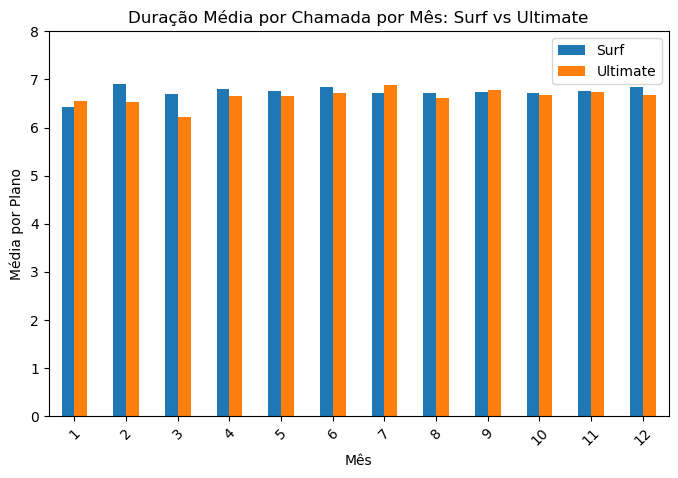

In [79]:
# Compare a duração média das chamadas de cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.
def calculate_mean_per_plan(plan_name):
    plan_df = user_info_df[user_info_df['plan'] == plan_name].copy()
    total_por_mes = plan_df.groupby('month').agg(
        total_min=('total_minutes', 'sum'),
        total_calls=('calls_made', 'sum')
    )
    return total_por_mes['total_min'] / total_por_mes['total_calls']
    
surf_mean = calculate_mean_per_plan('surf')
ultimate_mean = calculate_mean_per_plan('ultimate')

result_df = pd.DataFrame({
    'surf': surf_mean,
    'ultimate': ultimate_mean
}).fillna(0)
result_df = result_df.sort_values('month').reset_index()

result_df.plot(
    y=['surf','ultimate'],
    x='month',
    kind='bar',
    title='Duração Média por Chamada por Mês: Surf vs Ultimate',
    xlabel='Mês',
    ylabel='Média por Plano',
    ylim=(0,8),
    figsize=(8,5),
    rot=45
)
plt.legend(['Surf','Ultimate'])
plt.show()

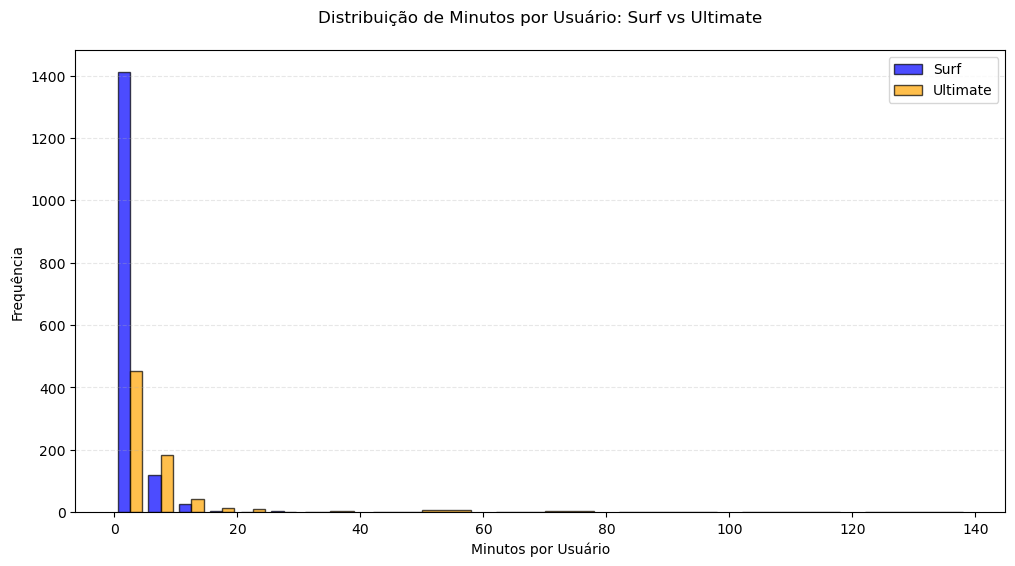

In [80]:
# Compare o número de minutos que os usuários de cada plano necessitam a cada mês. Construa um histograma.
user_info_df['minutes_per_user'] = user_info_df['total_minutes'] / user_info_df.groupby(['month', 'plan'], observed=False)['user_id'].transform('nunique')

surf_data = user_info_df[user_info_df['plan'] == 'surf']['minutes_per_user']
ultimate_data = user_info_df[user_info_df['plan'] == 'ultimate']['minutes_per_user']

plt.figure(figsize=(12, 6))

plt.hist(
    [surf_data, ultimate_data],
    bins=[0,5,10,15,20,25,30,40,60,80,100,120,140],
    color=['blue', 'orange'],
    alpha=0.7,
    label=['Surf', 'Ultimate'],
    edgecolor='black',
    stacked=False
)

plt.title('Distribuição de Minutos por Usuário: Surf vs Ultimate', pad=20)
plt.xlabel('Minutos por Usuário')
plt.ylabel('Frequência')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

[Calcule a média e a variância da duração das chamadas para refletir se os usuários de cada plano possuem comportamentos diferentes sobre as chamadas.]

In [81]:
# Calcule a média e a variância da duração mensal das chamadas
stats_by_plan = user_info_df.groupby('plan', observed=False)['total_minutes'].agg(['mean', 'var'])
stats_by_plan

,mean,var
plan,,
surf,412.210489,46172.905560
ultimate,410.185287,50030.010353


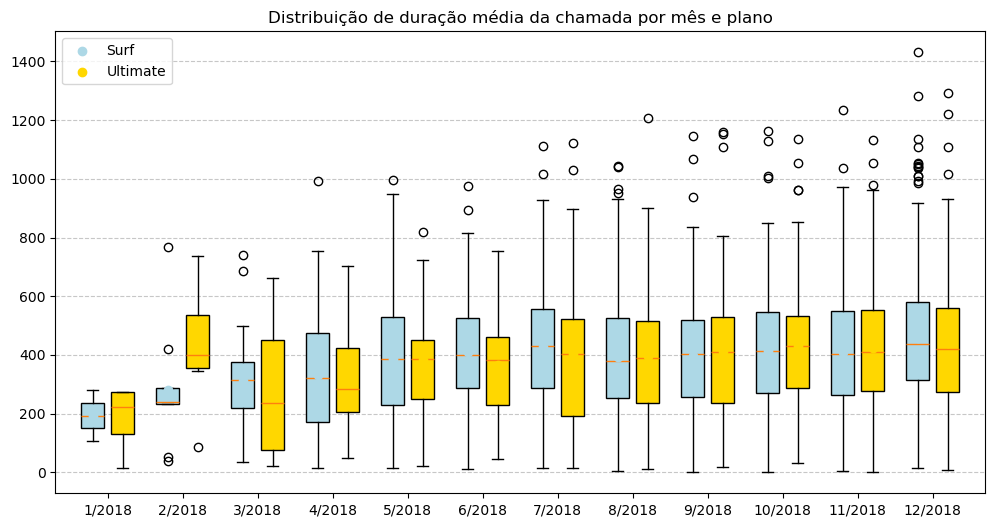

In [82]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas
plt.figure(figsize=(12, 6))

months = sorted(user_info_df['month'].unique())

for i, month in enumerate(months):
    surf_data = user_info_df[(user_info_df['plan'] == 'surf') & (user_info_df['month'] == month)]['total_minutes']
    ultimate_data = user_info_df[(user_info_df['plan'] == 'ultimate') & (user_info_df['month'] == month)]['total_minutes']
    
    box_surf = plt.boxplot(surf_data, positions=[i - 0.2], widths=0.3, patch_artist=True)
    box_ultimate = plt.boxplot(ultimate_data, positions=[i + 0.2], widths=0.3, patch_artist=True)
    
    for box in box_surf['boxes']: box.set_facecolor('lightblue')
    for box in box_ultimate['boxes']: box.set_facecolor('gold')
    
    plt.scatter(i - 0.2, surf_data.mean(), color='lightblue', zorder=5, label='Surf' if i==0 else "")
    plt.scatter(i + 0.2, ultimate_data.mean(), color='gold', zorder=5, label='Ultimate' if i==0 else "")

plt.xticks(range(len(months)), [f'{m}/2018' for m in months])
plt.title('Distribuição de duração média da chamada por mês e plano')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

[Formule conclusões sobre como os usuários se comportam em termos de chamadas. O comportamento é diferente dependendo do plano?]

<span style='color:red'> O comportamento parece similar, ambas as médias e variancia estão proximas, suas medianas também são próximas. Unica diferença é a quantidade de outliers em surf sendo muito maior que em ultimate.

### Mensagens

In [92]:
# Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês
stats_by_messages = user_info_df.groupby('plan', observed=False)['messages_made'].agg(['mean', 'var'])
stats_by_messages

,mean,var
plan,,
surf,40.358025,857.008305
ultimate,45.296463,892.664339


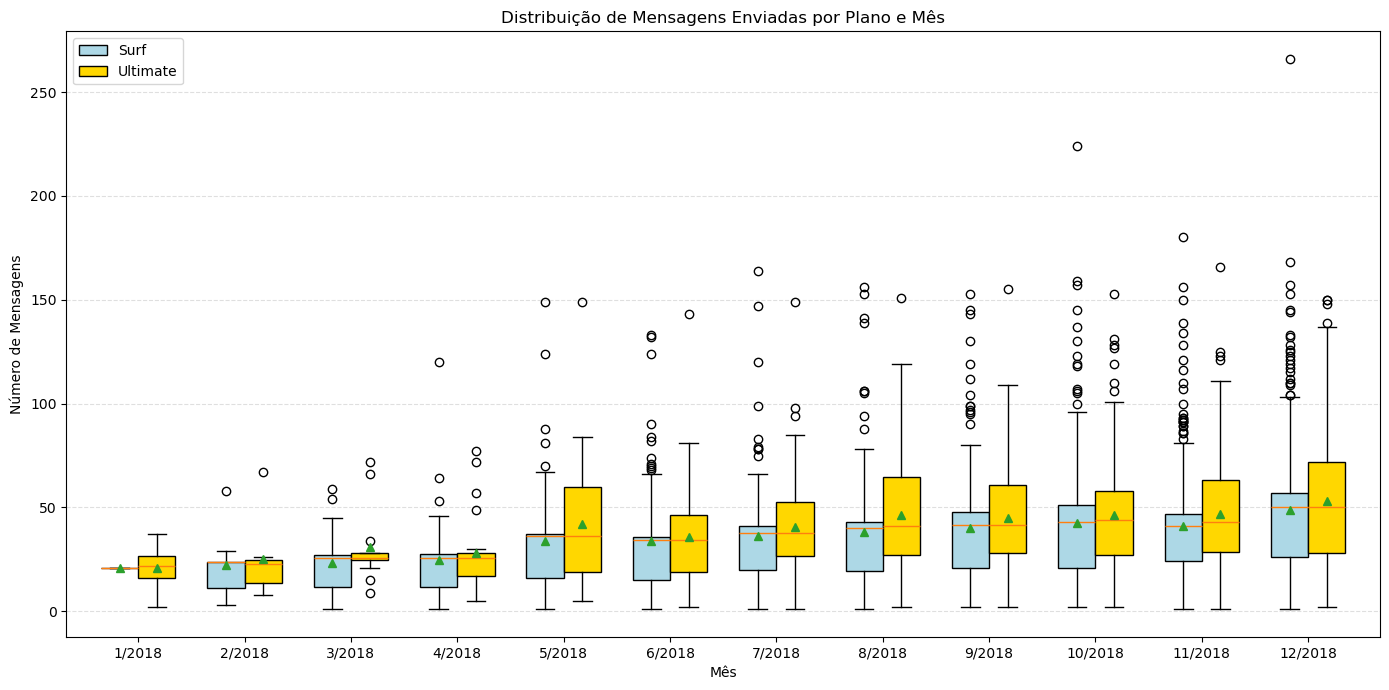

In [84]:
surf_data = user_info_df[user_info_df['plan'] == 'surf']
ultimate_data = user_info_df[user_info_df['plan'] == 'ultimate']
months = sorted(user_info_df['month'].unique())

plt.figure(figsize=(14, 7))
width = 0.35
positions = np.arange(len(months))

for i, month in enumerate(months):
    pos_surf = positions[i] - width/2
    pos_ultimate = positions[i] + width/2
    
    surf_month = surf_data[surf_data['month'] == month]['messages_made']
    ultimate_month = ultimate_data[ultimate_data['month'] == month]['messages_made']
    
    box_surf = plt.boxplot(surf_month, 
                         positions=[pos_surf], 
                         widths=width, 
                         patch_artist=True,
                         showmeans=True,
                )
    
    box_ultimate = plt.boxplot(ultimate_month, 
                             positions=[pos_ultimate], 
                             widths=width, 
                             patch_artist=True,
                             showmeans=True,
                    )
    for box in box_surf['boxes']:
        box.set_facecolor('lightblue')
    for box in box_ultimate['boxes']:
        box.set_facecolor('gold')
        
plt.xticks(positions, [f'{m}/2018' for m in months])
plt.title('Distribuição de Mensagens Enviadas por Plano e Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Mensagens')
plt.legend([box_surf["boxes"][0], box_ultimate["boxes"][0]], ['Surf', 'Ultimate'])
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

[Formule conclusões sobre como os usuários costumam consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]

<span style='color:red'> Embora ambos possuam medianas parecidas, dessa vez a quantidade de mensagens por usuario de ultimate é maior que em surf e novamente vale ressaltar que surf possui muitos outliers (provavelmente havera muita taxa extra sendo cobrada)

### Internet

In [93]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano
stats_gb = user_info_df.groupby('plan', observed=False)['total_gb'].agg(['mean', 'var'])
stats_gb

,mean,var
plan,,
surf,16.324839,58.736652
ultimate,16.835115,58.402774


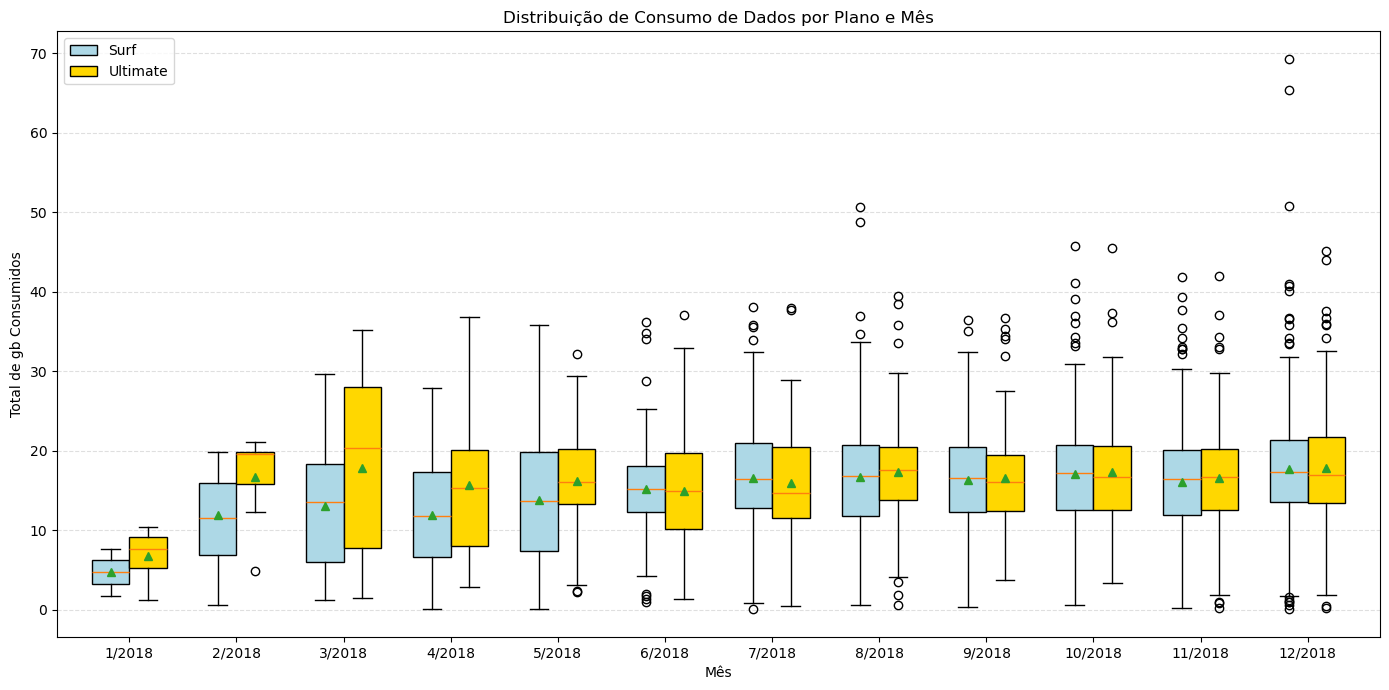

In [86]:
surf_data = user_info_df[user_info_df['plan'] == 'surf']
ultimate_data = user_info_df[user_info_df['plan'] == 'ultimate']
months = sorted(user_info_df['month'].unique())

plt.figure(figsize=(14, 7))
width = 0.35
x_pos = np.arange(len(months))

for i, month in enumerate(months):
    surf_gb = surf_data[surf_data['month'] == month]['total_gb']
    ultimate_gb = ultimate_data[ultimate_data['month'] == month]['total_gb']
    
    surf_pos = x_pos[i] - width/2
    ultimate_pos = x_pos[i] + width/2
    
    box_surf = plt.boxplot(surf_gb, 
                         positions=[surf_pos], 
                         widths=width, 
                         patch_artist=True,
                         showmeans=True,
                )
    
    box_ultimate = plt.boxplot(ultimate_gb, 
                             positions=[ultimate_pos], 
                             widths=width, 
                             patch_artist=True,
                             showmeans=True,
                    )
    
    for box in box_surf['boxes']:
        box.set_facecolor('lightblue')
    for box in box_ultimate['boxes']:
        box.set_facecolor('gold')

plt.xticks(x_pos, [f'{m}/2018' for m in months])
plt.title('Distribuição de Consumo de Dados por Plano e Mês')
plt.xlabel('Mês')
plt.ylabel('Total de gb Consumidos')
plt.legend([box_surf["boxes"][0], box_ultimate["boxes"][0]], ['Surf', 'Ultimate'])
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

[Formule conclusões sobre como os usuários tendem a consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]

<span style='color:red'> Ambos parecem a gastar quantidades parecidas de internet mensalmente, novamente alguns usuarios do plano surf estão usando mais do que deveriam.

## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

In [94]:
payment_stats = user_info_df.groupby('plan', observed=False)['payment'].agg(['mean', 'var'])
payment_stats

,mean,var
plan,,
surf,60.510107,3044.656222
ultimate,72.313889,129.848486


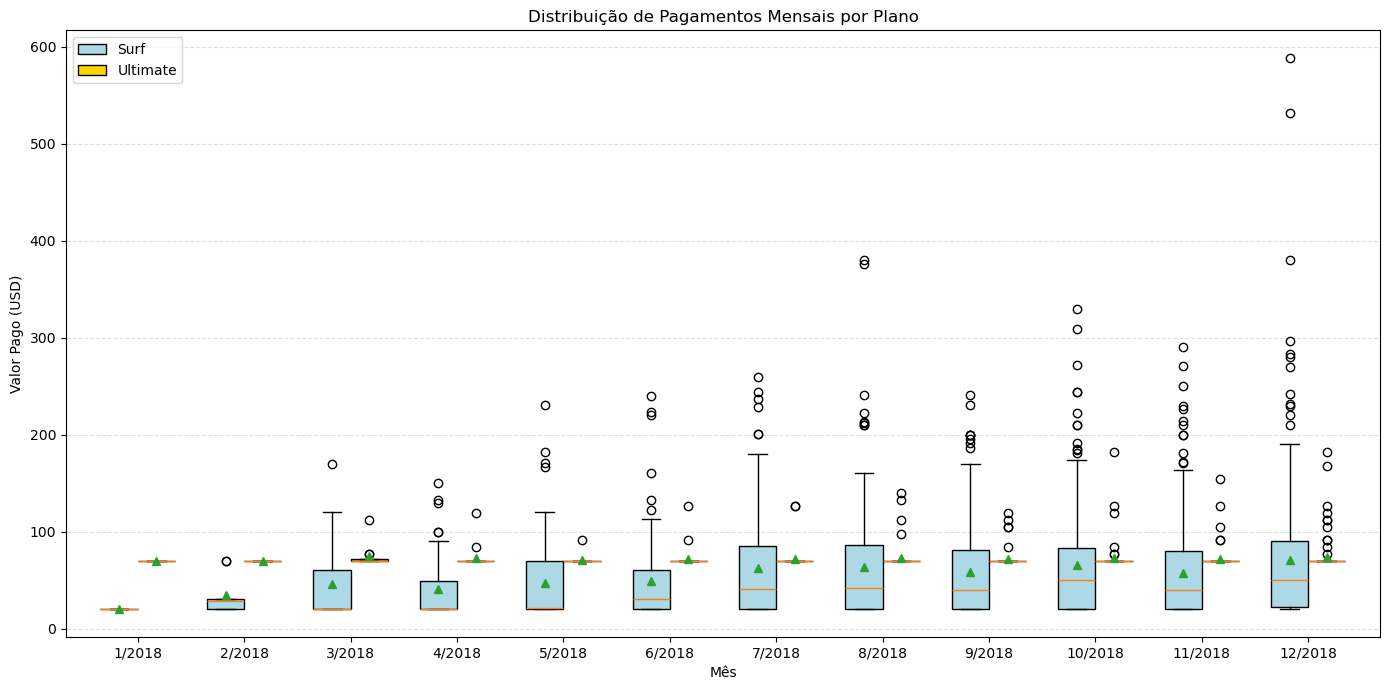

In [88]:
surf_data = user_info_df[user_info_df['plan'] == 'surf']
ultimate_data = user_info_df[user_info_df['plan'] == 'ultimate']
months = sorted(user_info_df['month'].unique())

plt.figure(figsize=(14, 7))
width = 0.35
x_pos = np.arange(len(months))

for i, month in enumerate(months):
    surf_payments = surf_data[surf_data['month'] == month]['payment']
    ultimate_payments = ultimate_data[ultimate_data['month'] == month]['payment']
    
    surf_pos = x_pos[i] - width/2
    ultimate_pos = x_pos[i] + width/2
    
    box_surf = plt.boxplot(surf_payments, 
                         positions=[surf_pos], 
                         widths=width, 
                         patch_artist=True,
                         showmeans=True,
                )
    
    box_ultimate = plt.boxplot(ultimate_payments, 
                             positions=[ultimate_pos], 
                             widths=width, 
                             patch_artist=True,
                             showmeans=True,
                    )
    
    for box in box_surf['boxes']:
        box.set_facecolor('lightblue')
    for box in box_ultimate['boxes']:
        box.set_facecolor('gold')

plt.xticks(x_pos, [f'{m}/2018' for m in months])
plt.title('Distribuição de Pagamentos Mensais por Plano')
plt.xlabel('Mês')
plt.ylabel('Valor Pago (USD)')
plt.legend([box_surf["boxes"][0], box_ultimate["boxes"][0]], ['Surf', 'Ultimate'])
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

[Formule conclusões sobre como a receita difere entre os planos.]

<span style='color:red'> Como era de se esperar, os usuarios de Surf não tem consistencia no seu uso de mensagens, duração de chamada e uso de dados, então muitos tendem a gastar com taxa extra, lembrando que a taxa extra é maior pra surf, seria melhor que eles só trocassem pro plano ultimate(melhor pra eles, não pra empresa) enquanto isso usuarios do plano ultimate tendem a gastar sempre dentro do planejado.

## Teste hipóteses estatísticas

[Teste a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

<span style='color:red'> Hipotese Nula: A receita média dos usuarios dos planos Ultimate e Surf são iguais

<span style='color:red'>Valor Alpha: 0.05

<span style='color:red'>Hipotese Alternativa: A receita média dos usuarios dos planos Ultimate e Surf são diferentes

In [89]:
# Teste as hipóteses
sample_surf = user_info_df[user_info_df['plan'] == 'surf']['payment']
sample_ultimate = user_info_df[user_info_df['plan'] == 'ultimate']['payment']

alpha = 0.05
results = st.ttest_ind(sample_surf, sample_ultimate)

print('valor-p: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p:  1.4812035136502999e-08
Rejeitamos a hipótese nula


[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

<span style='color:red'> Hipotese Nula: A receita média dos usuarios de NY-NJ são iguais aos demais usuários de outras regiões

<span style='color:red'>Valor Alpha: 0.05

<span style='color:red'>Hipotese Alternativa: A receita média dos usuarios de NY-NJ são diferentes dos demais usuários de outras regiões

In [90]:
ny_users = df_users[df_users['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
ny_user_ids = ny_users['user_id'].unique()

ny_revenue = user_info_df[user_info_df['user_id'].isin(ny_user_ids)]['payment'].mean()
other_revenue = user_info_df[~user_info_df['user_id'].isin(ny_user_ids)]['payment'].mean()
print(f'ny: {ny_revenue} outros: {other_revenue}')

ny: 59.61201186653637 outros: 65.12247926052082


In [91]:
# Teste as hipóteses
# Hipotese nula é que os valores são iguais com alpha igual 0.05
ny_sample = user_info_df[user_info_df['user_id'].isin(ny_user_ids)]['payment']
other_sample = user_info_df[~user_info_df['user_id'].isin(ny_user_ids)]['payment']

alpha = 0.05
results = st.ttest_ind(ny_sample, other_sample)

print('valor-p: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p:  0.0352716914836657
Rejeitamos a hipótese nula


## Conclusão geral

[Liste suas conclusões importantes nesta seção final, certifique-se de que elas cobrem todas as decisões (suposições) importantes que você tomou e que levaram à maneira como você processou e analisou os dados.]

<span style='color:red'> Acho que a análise importante foi ver os usuários que pagam por um plano mais barato tendem a gastar mais do que se eles pagassem pelo mais caro já que tendem a passar do limite, mesmo que passasem do limite com o outro plano, a taxa extra é mais barata então sempre seria mais barato trocar. Claro que isso não é de interesse da empresa já que resultaria em menos lucro, mas anunciar isso aos usuarios pode ser uma jogada de marketing pra ganhar mais potenciais usuarios pro futuro, então mais lucro ao longo prazo.